### 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Data Preprocessing

### 2. Load Data

In [2]:
df = pd.read_csv('stunting.csv')
df.head()

,JK,BB_Lahir,TB_Lahir,Umur,Berat,Tinggi,BB_U,ZS_BB_U,TB_U,ZS_TB_U,BB_TB,ZS_BB_TB,Status
0,P,3.0,45.0,0,3.0,45.0,Berat Badan Normal,-0.85,Pendek,-2.63,Gizi Baik,1.62,Stunting
1,L,2.8,48.0,0,2.8,48.0,Kurang,-2.82,Pendek,-2.65,Gizi Baik,-1.06,Stunting
2,L,2.8,43.0,0,2.8,43.0,Kurang,-2.74,Sangat Pendek,-5.17,NaN,NaN,Saverely Stunting
3,L,3.0,45.0,0,3.0,45.0,Berat Badan Normal,-1.54,Sangat Pendek,-3.48,Gizi Baik,1.70,Saverely Stunting
4,L,3.0,48.0,0,3.8,49.0,Berat Badan Normal,-1.16,Pendek,-2.91,Gizi Lebih,2.09,Stunting


In [3]:
# Melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   JK        2001 non-null   object 
 1   BB_Lahir  1954 non-null   float64
 2   TB_Lahir  1943 non-null   float64
 3   Umur      2001 non-null   int64  
 4   Berat     2001 non-null   float64
 5   Tinggi    2001 non-null   float64
 6   BB_U      2001 non-null   object 
 7   ZS_BB_U   2001 non-null   float64
 8   TB_U      2001 non-null   object 
 9   ZS_TB_U   2001 non-null   float64
 10  BB_TB     1997 non-null   object 
 11  ZS_BB_TB  1998 non-null   float64
 12  Status    2001 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 203.4+ KB


In [4]:
# Deskripsi statistik
df.describe()

,BB_Lahir,TB_Lahir,Umur,Berat,Tinggi,ZS_BB_U,ZS_TB_U,ZS_BB_TB
count,1954.000000,1943.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,1998.000000
mean,2.930276,46.367936,31.629185,10.467166,82.970365,-2.120110,-2.756607,-0.797708
std,0.682778,10.931419,14.243119,2.144625,9.528622,0.836156,0.588466,1.147021
min,0.000000,0.000000,0.000000,1.800000,41.000000,-5.330000,-6.000000,-4.650000
25%,2.800000,48.000000,21.000000,9.000000,77.000000,-2.640000,-3.000000,-1.550000
50%,3.000000,49.000000,31.000000,10.500000,84.000000,-2.180000,-2.620000,-0.910000
75%,3.100000,50.000000,43.000000,12.000000,90.000000,-1.610000,-2.330000,-0.142500
max,8.000000,75.000000,60.000000,17.200000,100.000000,3.040000,-2.010000,6.020000


In [5]:
# Melihat frekuensi dari masing-masing kolom
for col in df.columns:
    frekuensi = df[col].value_counts()
    print(f"Frekuensi dalam kolom {col}:\n{frekuensi}\n")

Frekuensi dalam kolom JK:
JK
L    1114
P     887
Name: count, dtype: int64

Frekuensi dalam kolom BB_Lahir:
BB_Lahir
3.00    653
2.80    197
3.20    157
2.90    139
4.00    113
3.10     86
2.70     77
2.50     71
0.00     53
2.60     52
3.50     50
3.30     46
3.40     44
2.40     29
2.00     25
2.30     24
3.60     22
2.20     18
3.80     18
3.70      9
2.10      8
1.80      8
3.90      7
1.90      4
1.60      4
1.70      3
8.00      3
4.30      2
2.95      2
1.30      2
2.75      2
5.00      1
6.30      1
2.35      1
2.66      1
1.40      1
2.85      1
3.57      1
1.77      1
3.24      1
2.98      1
2.13      1
4.20      1
3.05      1
1.78      1
2.65      1
1.10      1
1.00      1
3.17      1
1.06      1
1.85      1
5.30      1
3.11      1
2.34      1
1.20      1
4.40      1
4.10      1
Name: count, dtype: int64

Frekuensi dalam kolom TB_Lahir:
TB_Lahir
50.0    726
49.0    382
48.0    347
47.0    135
0.0      98
46.0     61
45.0     48
51.0     33
52.0     29
44.0     14
43.0      8

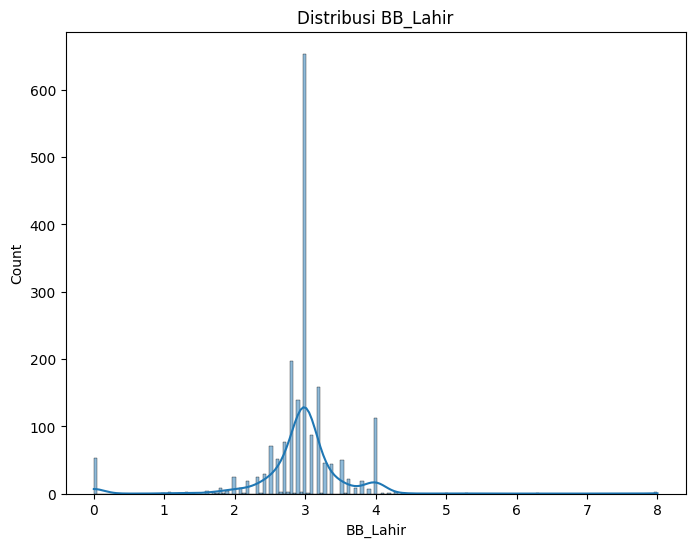

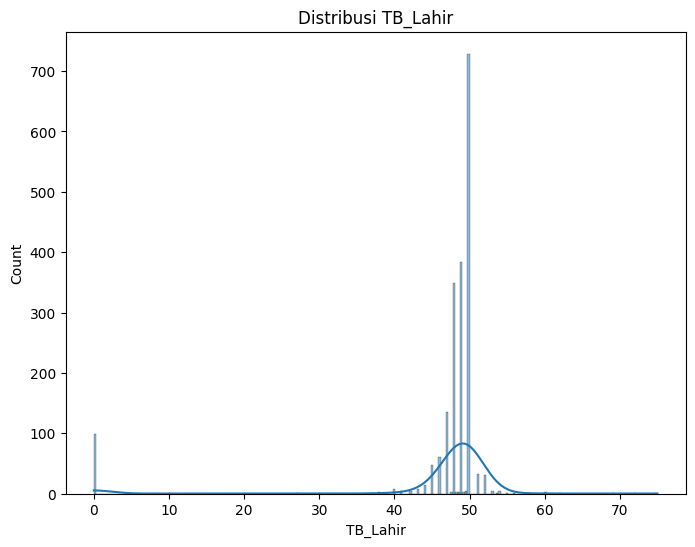

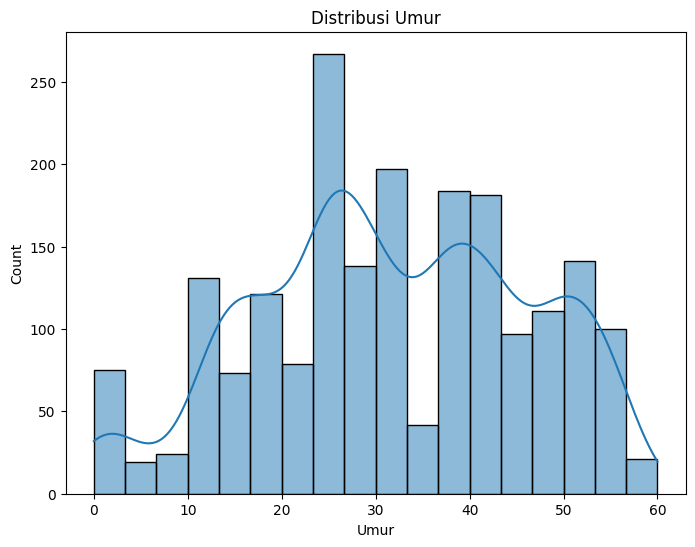

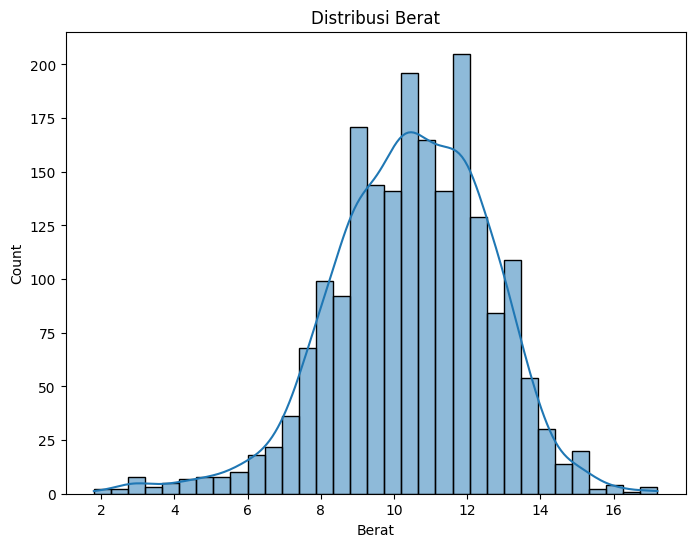

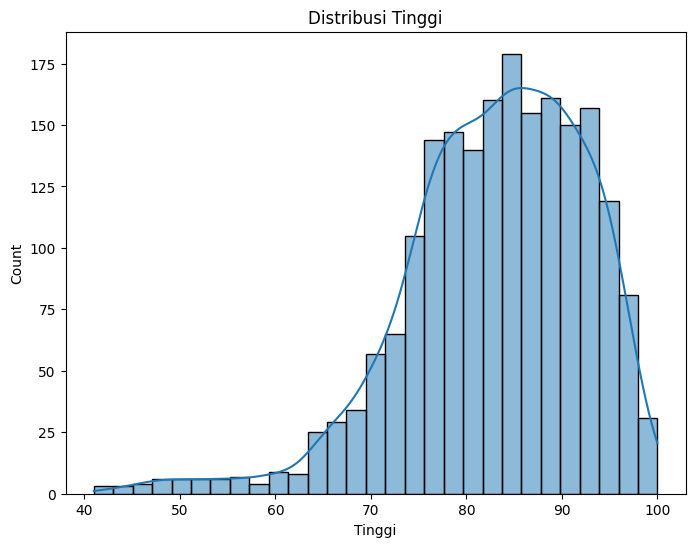

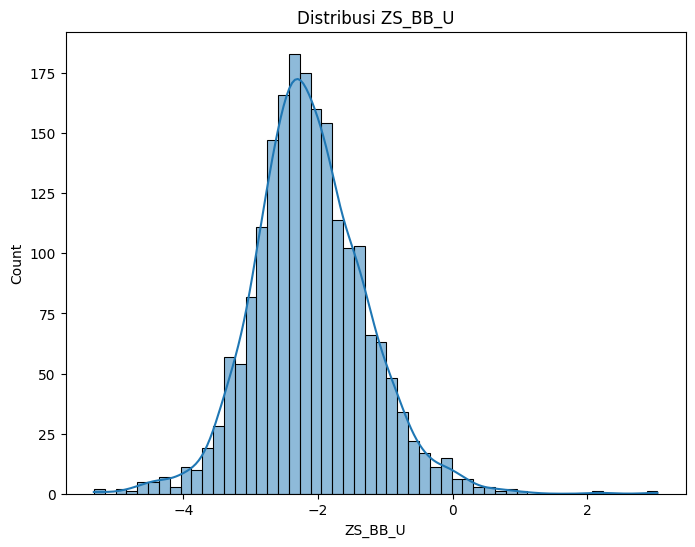

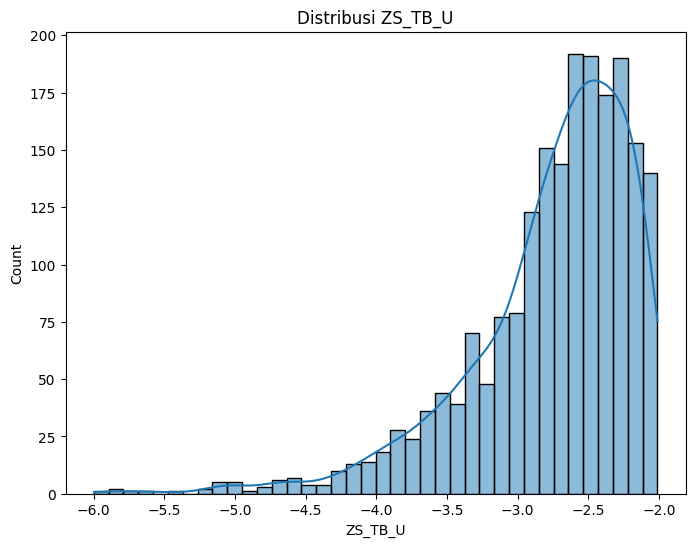

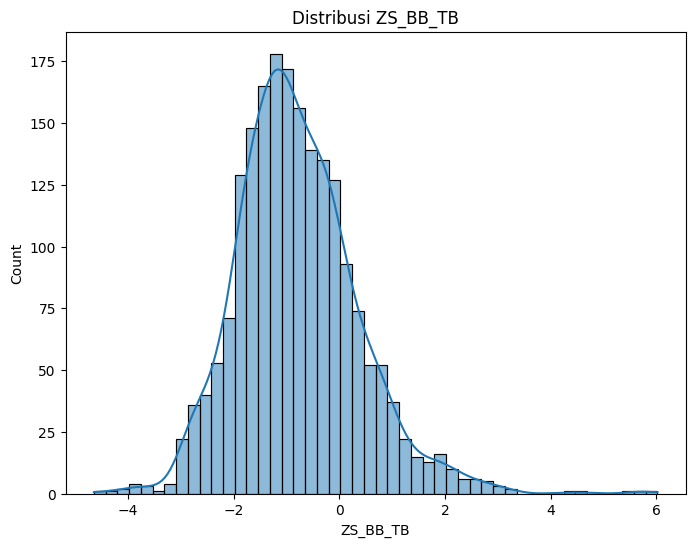

In [6]:
# Visualisasi kolom numerik
numerik_columns = ['BB_Lahir', 'TB_Lahir', 'Umur', 'Berat', 'Tinggi', 'ZS_BB_U', 'ZS_TB_U', 'ZS_BB_TB']

for col in numerik_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

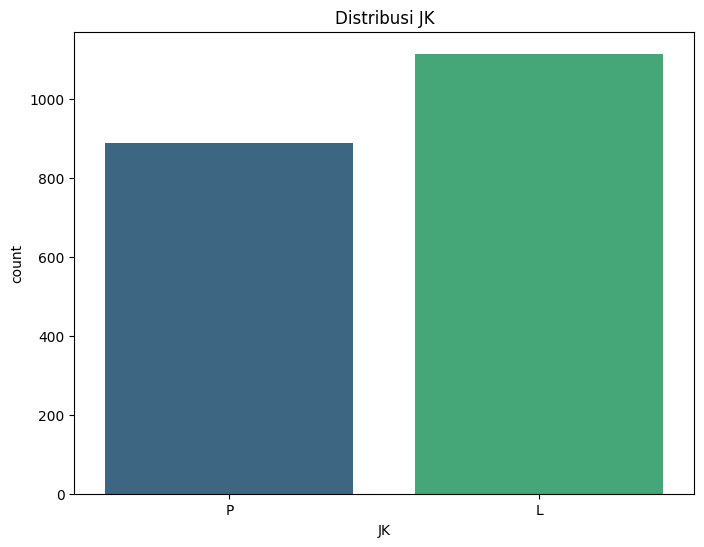

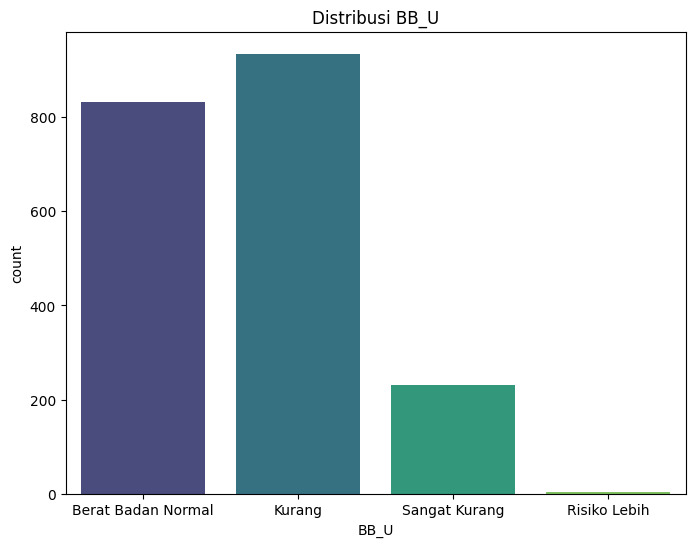

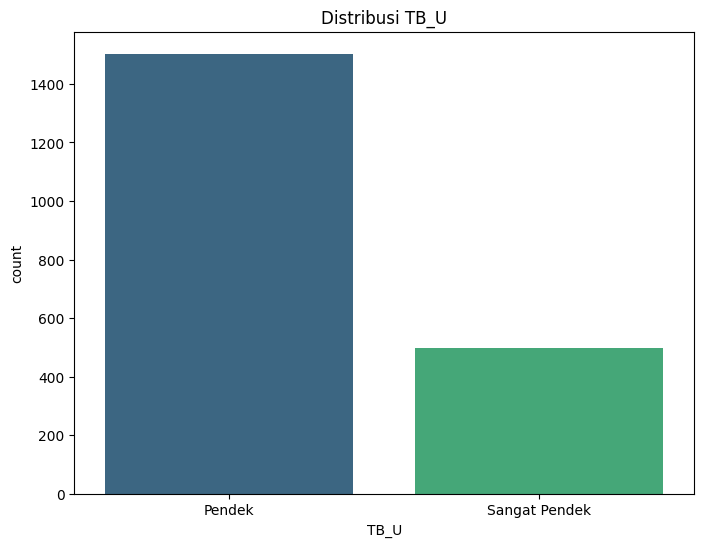

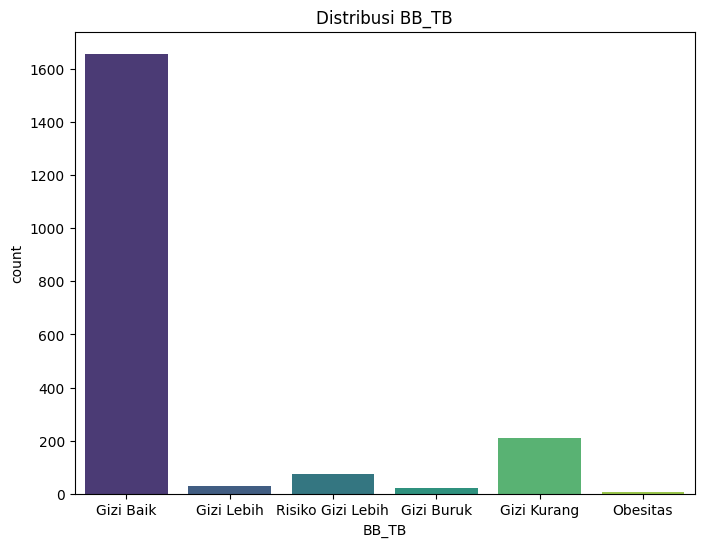

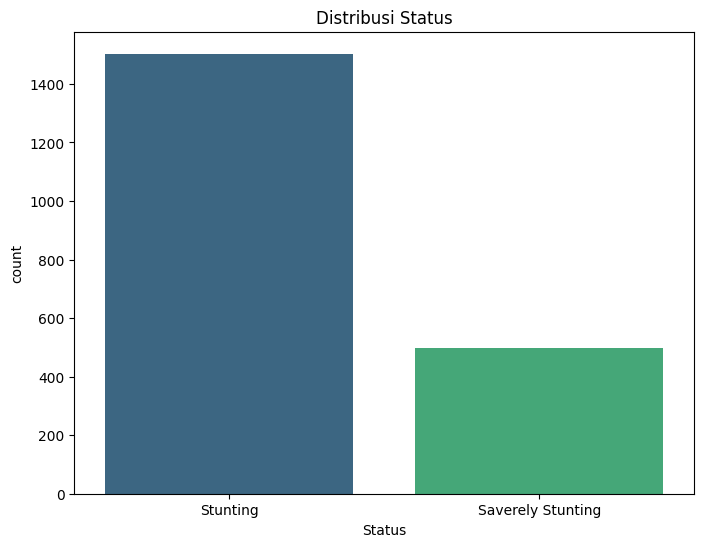

In [7]:
# Visualisasi kolom kategorik
kategorik_columns = ['JK', 'BB_U', 'TB_U', 'BB_TB', 'Status']

for col in kategorik_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribusi {col}')
    plt.show()

### 3. Hapus data kolom kosong

In [8]:
# Ganti nilai 0 pada kolom bb lahir dan tb lahir menjadi missing value
df['BB_Lahir'].replace(0, np.nan, inplace=True)
df['TB_Lahir'].replace(0, np.nan, inplace=True)

In [9]:
# Cek Missing Value
df.isnull().sum()

JK            0
BB_Lahir    100
TB_Lahir    156
Umur          0
Berat         0
Tinggi        0
BB_U          0
ZS_BB_U       0
TB_U          0
ZS_TB_U       0
BB_TB         4
ZS_BB_TB      3
Status        0
dtype: int64

In [10]:
# Hapus data kolom kosong
df = df.dropna()

# Data Transformation

### 4. Label Encoding

In [11]:
encode = LabelEncoder()

In [12]:
df['JK'] = encode.fit_transform(df['JK'].values)
df['BB_U'] = encode.fit_transform(df['BB_U'].values)
df['TB_U'] = encode.fit_transform(df['TB_U'].values)
df['BB_TB'] = encode.fit_transform(df['BB_TB'].values)
df['Status'] = encode.fit_transform(df['Status'].values)

In [13]:
df.head()

,JK,BB_Lahir,TB_Lahir,Umur,Berat,Tinggi,BB_U,ZS_BB_U,TB_U,ZS_TB_U,BB_TB,ZS_BB_TB,Status
0,1,3.0,45.0,0,3.0,45.0,0,-0.85,0,-2.63,0,1.62,1
1,0,2.8,48.0,0,2.8,48.0,1,-2.82,0,-2.65,0,-1.06,1
3,0,3.0,45.0,0,3.0,45.0,0,-1.54,1,-3.48,0,1.70,0
4,0,3.0,48.0,0,3.8,49.0,0,-1.16,0,-2.91,3,2.09,1
5,0,3.3,45.0,0,3.3,45.0,0,-0.04,0,-2.30,5,2.67,1


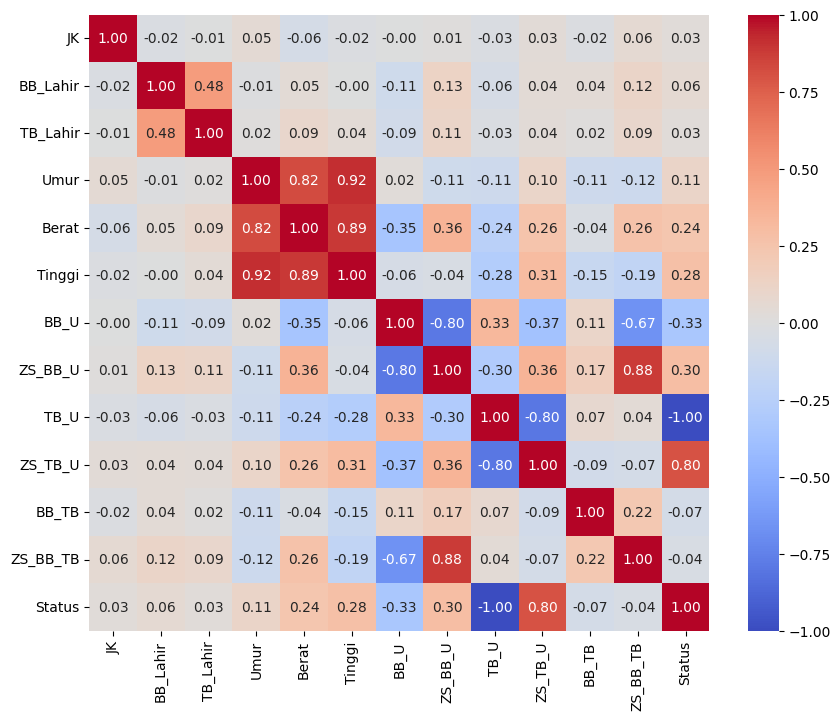

In [14]:
# Matriks Korelasi
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
           xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.show()

In [15]:
# Nilai Korelasi Variabel
correlation_matrix = df.corr()
correlation_matrix['Status'].sort_values(ascending = False)

Status      1.000000
ZS_TB_U     0.802784
ZS_BB_U     0.295741
Tinggi      0.276602
Berat       0.237167
Umur        0.111151
BB_Lahir    0.055740
JK          0.030435
TB_Lahir    0.028061
ZS_BB_TB   -0.044025
BB_TB      -0.071241
BB_U       -0.328960
TB_U       -1.000000
Name: Status, dtype: float64

### 5. Split dataset

In [16]:
df.columns

Index(['JK', 'BB_Lahir', 'TB_Lahir', 'Umur', 'Berat', 'Tinggi', 'BB_U',
       'ZS_BB_U', 'TB_U', 'ZS_TB_U', 'BB_TB', 'ZS_BB_TB', 'Status'],
      dtype='object')

In [17]:
# Menentukan X (atribut) dan y (kelas)
X = df[['JK', 'Umur', 'Berat', 'Tinggi', 'ZS_TB_U']]
y = df['Status']

In [18]:
# Pisahkan data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [19]:
# Melihat data setelah dilakukan split data

print("Ini adalah jumlah data X_train:", X_train.shape[0])
print("Ini adalah jumlah data X_test:", X_test.shape[0])

Ini adalah jumlah data X_train: 1472
Ini adalah jumlah data X_test: 369


### 6. Handling imbalance data / SMOTE

In [20]:
# Terapkan SMOTE untuk oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [21]:
# Melihat data setelah dilakukan resampled

print("Ini adalah X_train setelah SMOTE:", X_train_resampled.shape)
print("Ini adalah y_train setelah SMOTE:", y_train_resampled.shape)

Ini adalah X_train setelah SMOTE: (2200, 5)
Ini adalah y_train setelah SMOTE: (2200,)


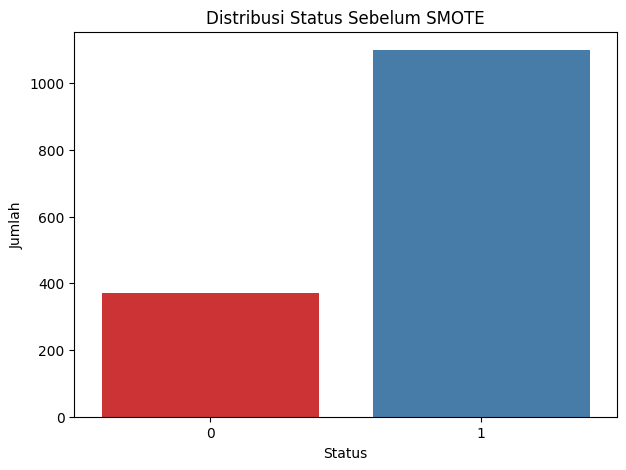

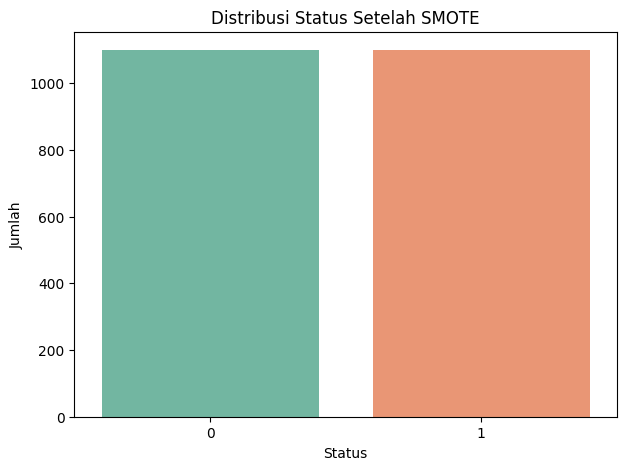

In [22]:
# Plot sebelum SMOTE
plt.figure(figsize=(7, 5))
sns.countplot(x=y_train, palette='Set1')
plt.title('Distribusi Status Sebelum SMOTE')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

# Plot setelah SMOTE
plt.figure(figsize=(7, 5))
sns.countplot(x=y_train_resampled, palette='Set2')
plt.title('Distribusi Status Setelah SMOTE')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

### 7. Normalisasi data

In [23]:
# Skalakan fitur ke rentang [0, 1] menggunakan MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler pada data train dan transformi data latih
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transformasi data test menggunakan scaler yang sama
X_test_scaled = scaler.transform(X_test)

In [24]:
print(X_train_scaled)

[[1.         0.51666667 0.51020408 0.67636364 0.84974093]
 [0.         0.68333333 0.69387755 0.83818182 0.9507772 ]
 [0.         0.66666667 0.57823129 0.8        0.87823834]
 ...
 [0.         0.48333333 0.45301391 0.61818182 0.49669202]
 [0.         0.71666667 0.59706492 0.77910054 0.69367344]
 [0.         0.71666667 0.63241105 0.7817997  0.69944237]]


In [25]:
# Menambahkan dimensi waktu ke data train dan test
X_train = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [26]:
# Melihat dimensi data
print(X_train.shape)
print(X_train.shape[0])
print(X_train.shape[1])

(2200, 5, 1)
2200
5


In [27]:
# Melihat dimensi data
print(y_test.shape)

(369,)


# Data Mining

### 8. Modeling LSTM

In [28]:
# Parameter
num_neuron = 128
num_epoch = 100
num_batch = 256

# Model LSTM
model = Sequential()
model.add(LSTM(num_neuron, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(num_neuron, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Kompile model
Adam = Adam(learning_rate = 0.001)
model.compile(optimizer=Adam, loss='binary_crossentropy', metrics=['accuracy'])

# Pelatihan model
history = model.fit(X_train,
                    y_train_resampled,
                    epochs=num_epoch,
                    batch_size=num_batch,
                    validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 5, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 198273 (774.50 KB)
Trainable params: 198273 (774.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
9/9 [==============================] - 8s 237ms/step - loss: 0.6921 - accuracy: 0.5214 - val_loss: 0.6788 - val_accuracy: 0.7480
Epoch 2

Epoch 52/100
9/9 [==============================] - 1s 141ms/step - loss: 0.0997 - accuracy: 0.9668 - val_loss: 0.0736 - val_accuracy: 0.9783
Epoch 53/100
9/9 [==============================] - 1s 133ms/step - loss: 0.0965 - accuracy: 0.9659 - val_loss: 0.0579 - val_accuracy: 0.9892
Epoch 54/100
9/9 [==============================] - 1s 147ms/step - loss: 0.0977 - accuracy: 0.9636 - val_loss: 0.0681 - val_accuracy: 0.9892
Epoch 55/100
9/9 [==============================] - 1s 160ms/step - loss: 0.0953 - accuracy: 0.9573 - val_loss: 0.0781 - val_accuracy: 0.9756
Epoch 56/100
9/9 [==============================] - 1s 168ms/step - loss: 0.0945 - accuracy: 0.9645 - val_loss: 0.0549 - val_accuracy: 0.9783
Epoch 57/100
9/9 [==============================] - 1s 147ms/step - loss: 0.0874 - accuracy: 0.9645 - val_loss: 0.1117 - val_accuracy: 0.9458
Epoch 58/100
9/9 [==============================] - 1s 141ms/step - loss: 0.0903 - accuracy: 0.9673 - val_loss: 0.0695 - val_accuracy: 0.9783
Epoch 

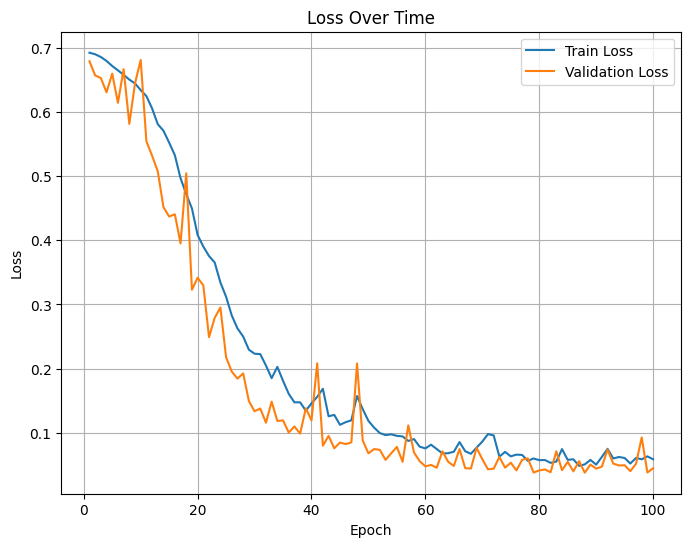

In [29]:
# Mendapatkan nilai loss pada setiap epoch
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Membuat grafik loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation/Evaluation

### 9. Evaluasi pada data train

In [30]:
# Evaluasi model pada data pelatihan
loss, accuracy = model.evaluate(X_train, y_train_resampled, verbose=0)

# Prediksi pada data pelatihan
y_train_pred = model.predict(X_train, verbose=0)

# Konversi hasil prediksi menjadi label biner (0 atau 1)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

### 10. Evaluasi pada data test

In [31]:
# Evaluasi model pada data pengujian
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Prediksi pada data pelatihan
y_pred = model.predict(X_test, verbose=0)

# Konversi hasil prediksi menjadi label biner (0 atau 1)
y_pred_binary = (y_pred > 0.5).astype(int)

In [32]:
# Hitung akurasi
accuracy = accuracy_score(y_train_resampled, y_train_pred_binary)
print(f'Accuracy data train: {accuracy}')

accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy data test: {accuracy}')

Accuracy data train: 0.9872727272727273
Accuracy data test: 0.989159891598916


### 11. Classification Report

In [33]:
# Tampilkan laporan klasifikasi
report = classification_report(y_test, y_pred_binary)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        93
           1       1.00      0.99      0.99       276

    accuracy                           0.99       369
   macro avg       0.98      0.99      0.99       369
weighted avg       0.99      0.99      0.99       369



### 12. Confusion matrix

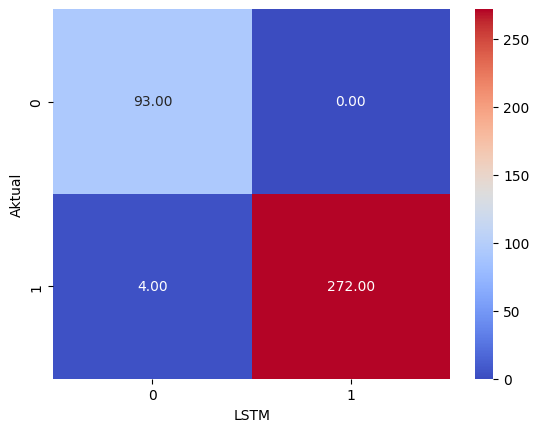

In [34]:
# Tampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, ax=ax)
ax.set_xlabel('LSTM')
ax.set_ylabel('Aktual')
plt.show()

In [35]:
print(cm)

[[ 93   0]
 [  4 272]]


In [36]:
comparison_df = pd.DataFrame({'Data Test': y_test, 'Data Hasil Model LSTM': y_pred_binary.flatten()})
print(comparison_df)

      Data Test  Data Hasil Model LSTM
850           0                      0
1795          1                      1
260           0                      0
1899          1                      1
1570          1                      1
...         ...                    ...
1414          1                      1
1139          1                      1
1576          1                      1
1101          1                      1
927           1                      1

[369 rows x 2 columns]
